/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Clustered data saved to 'daily_features_with_clusters.csv'.


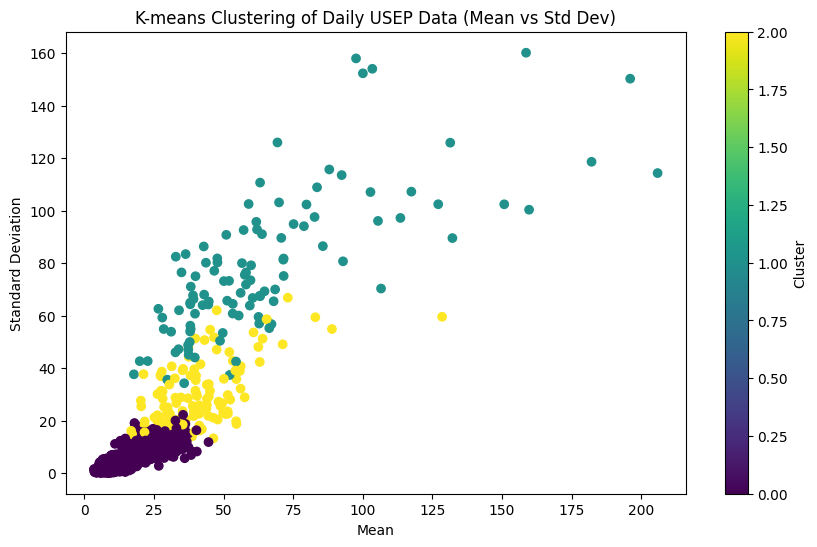

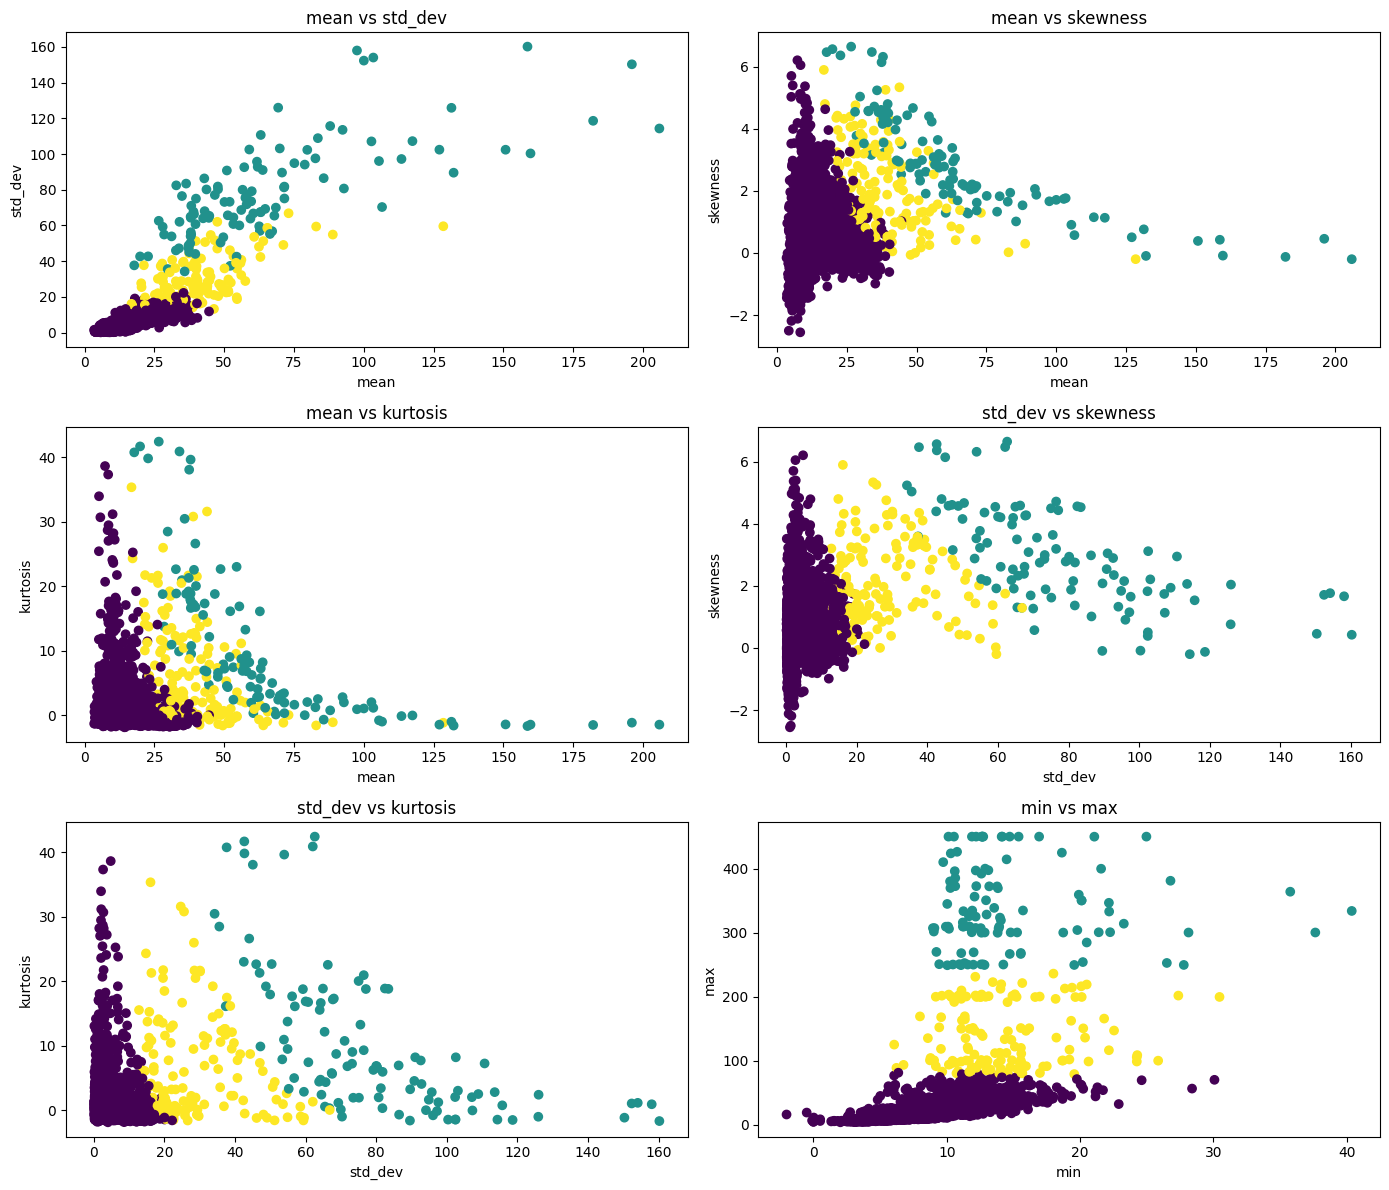

Cluster centroids:
[[ 13.60448635   3.86123569   0.64836762   1.22627575   8.8350462
   23.12009681]
 [ 65.55890625  78.28122927   2.90286993  10.22257267  14.91462264
  338.0159717 ]
 [ 39.86869479  28.81523305   2.14694936   6.63998295  14.23937143
  140.11586429]]


In [ ]:
import pandas as pd
from scipy.stats import skew, kurtosis
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load data
file_paths = [
    '2019c.csv',
    '2020c.csv',
    '2021c.csv',
    '2022c.csv',
    '2023c.csv',
    '2024c.csv'
]

# Read all files into one Datetime
dfs = [pd.read_csv(file) for file in file_paths]
combined_df = pd.concat(dfs)

# Convert the Datetime column to datetime format
combined_df['Datetime'] = pd.to_datetime(combined_df['Datetime'])
combined_df.set_index('Datetime', inplace=True)

# Resample the data by day and calculate the specified features for each day
daily_features = combined_df.resample('D')['USEP (c/kWh)'].agg(
    mean='mean',
    std_dev='std',
    skewness=lambda x: skew(x),
    kurtosis=lambda x: kurtosis(x),
    min='min',
    max='max'
).dropna()

# Prepare data for clustering (using specified features)
X = daily_features[['mean', 'std_dev', 'skewness', 'kurtosis', 'min', 'max']].fillna(0)

# Run K-means clustering (K=3)
kmeans = KMeans(n_clusters=3, random_state=42)
daily_features['Cluster'] = kmeans.fit_predict(X)

# Save the daily features with clusters to a CSV file
daily_features.to_csv('daily_features_with_clusters.csv')
print("Clustered data saved to 'daily_features_with_clusters.csv'.")

# Plotting the clusters (mean vs std_dev)
plt.figure(figsize=(10, 6))
plt.scatter(daily_features['mean'], daily_features['std_dev'], c=daily_features['Cluster'], cmap='viridis')
plt.xlabel('Mean')
plt.ylabel('Standard Deviation')
plt.title('K-means Clustering of Daily USEP Data (Mean vs Std Dev)')
plt.colorbar(label='Cluster')
plt.show()

# Plotting multiple feature combinations
feature_combinations = [
    ('mean', 'std_dev'),
    ('mean', 'skewness'),
    ('mean', 'kurtosis'),
    ('std_dev', 'skewness'),
    ('std_dev', 'kurtosis'),
    ('min', 'max')
]

fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.flatten()

for i, (x_feature, y_feature) in enumerate(feature_combinations):
    axes[i].scatter(daily_features[x_feature], daily_features[y_feature], c=daily_features['Cluster'], cmap='viridis')
    axes[i].set_xlabel(x_feature)
    axes[i].set_ylabel(y_feature)
    axes[i].set_title(f'{x_feature} vs {y_feature}')

plt.tight_layout()
plt.show()

# Show the centroids of the clusters
print("Cluster centroids:")
print(kmeans.cluster_centers_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

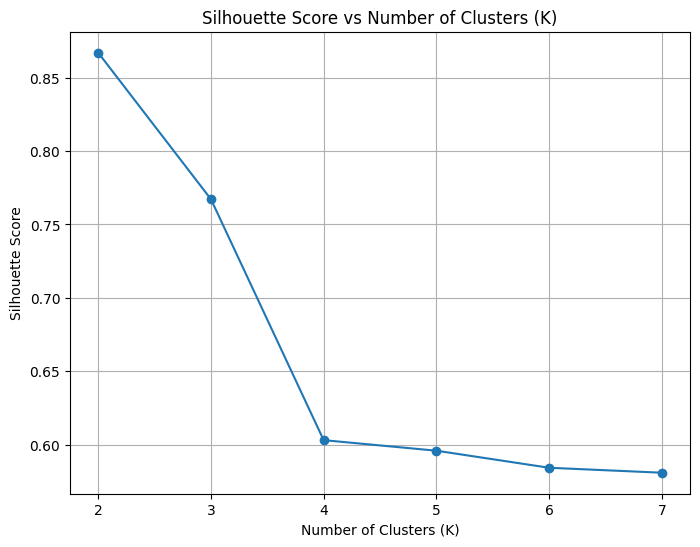

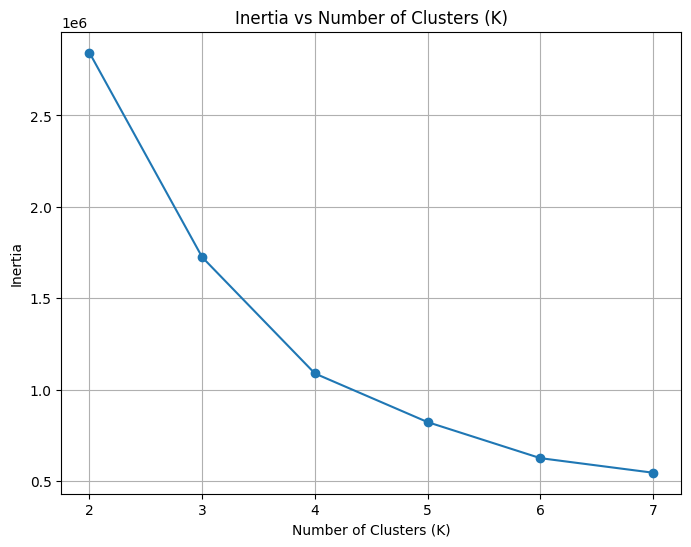

In [ ]:
from sklearn.metrics import silhouette_score

# Initialize lists to store inertia and silhouette scores
inertia_scores = []
silhouette_scores = []

# Run K-means clustering for K=2 to K=7 and calculate the inertia and silhouette scores
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)

    # Compute inertia (sum of squared distances to the closest cluster center)
    inertia = kmeans.inertia_
    inertia_scores.append(inertia)

    # Compute silhouette score (measure of how similar an object is to its own cluster compared to other clusters)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Creating a DataFrame to display the inertia and silhouette scores in a tabular format
k_values = range(2, 8)
results_df = pd.DataFrame({
    'K': k_values,
    'Inertia': inertia_scores,
    'Silhouette Score': silhouette_scores
})

# Displaying the table to the user
results_df

# Plotting the silhouette score with respect to K to visualize the elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(2, 8), silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters (K)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Plotting the inertia score with respect to K to visualize the elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(2, 8), inertia_scores, marker='o')
plt.title('Inertia vs Number of Clusters (K)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()



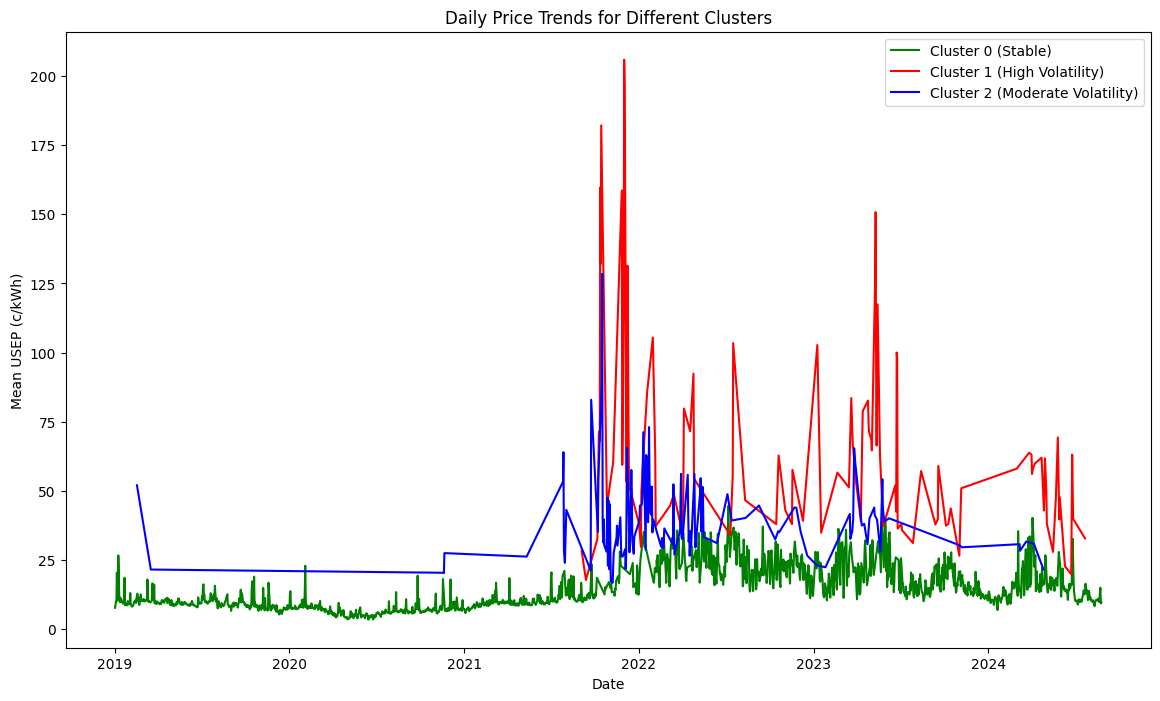

In [ ]:
# Plot the trend for each cluster group

plt.figure(figsize=(14, 8))

# Cluster 0
cluster_0_data = daily_features[daily_features['Cluster'] == 0]
plt.plot(cluster_0_data.index, cluster_0_data['mean'], label='Cluster 0 (Stable)', color='g')

# Cluster 1
cluster_1_data = daily_features[daily_features['Cluster'] == 1]
plt.plot(cluster_1_data.index, cluster_1_data['mean'], label='Cluster 1 (High Volatility)', color='r')

# Cluster 2
cluster_2_data = daily_features[daily_features['Cluster'] == 2]
plt.plot(cluster_2_data.index, cluster_2_data['mean'], label='Cluster 2 (Moderate Volatility)', color='b')

# Add labels, legend, and title
plt.title('Daily Price Trends for Different Clusters')
plt.xlabel('Date')
plt.ylabel('Mean USEP (c/kWh)')
plt.legend()

# Show the plot
plt.show()

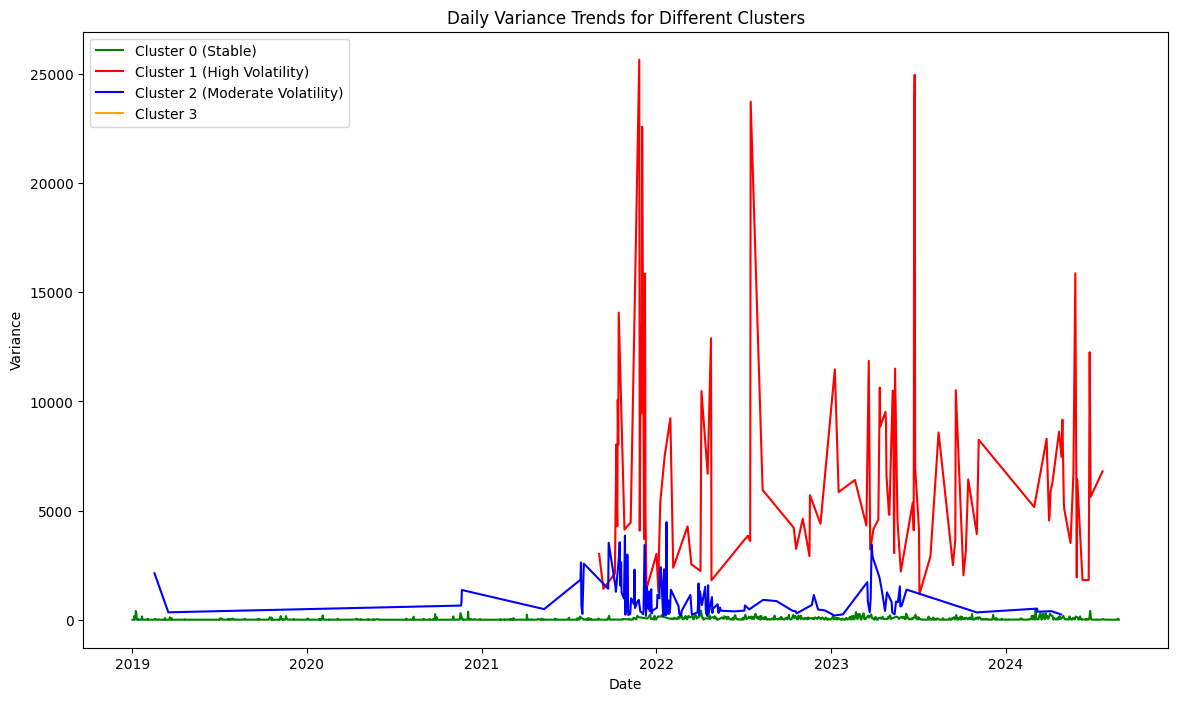

In [ ]:
# Calculate variance as the square of the standard deviation
daily_features['variance'] = daily_features['std_dev'] ** 2

# Plot the variance for each cluster group
plt.figure(figsize=(14, 8))

# Cluster 0
cluster_0_data = daily_features[daily_features['Cluster'] == 0]
plt.plot(cluster_0_data.index, cluster_0_data['variance'], label='Cluster 0 (Stable)', color='g')

# Cluster 1
cluster_1_data = daily_features[daily_features['Cluster'] == 1]
plt.plot(cluster_1_data.index, cluster_1_data['variance'], label='Cluster 1 (High Volatility)', color='r')

# Cluster 2
cluster_2_data = daily_features[daily_features['Cluster'] == 2]
plt.plot(cluster_2_data.index, cluster_2_data['variance'], label='Cluster 2 (Moderate Volatility)', color='b')

# Cluster 3
cluster_3_data = daily_features[daily_features['Cluster'] == 3]
plt.plot(cluster_3_data.index, cluster_3_data['variance'], label='Cluster 3', color='orange')

# Add labels, legend, and title
plt.title('Daily Variance Trends for Different Clusters')
plt.xlabel('Date')
plt.ylabel('Variance')
plt.legend()

# Show the plot
plt.show()


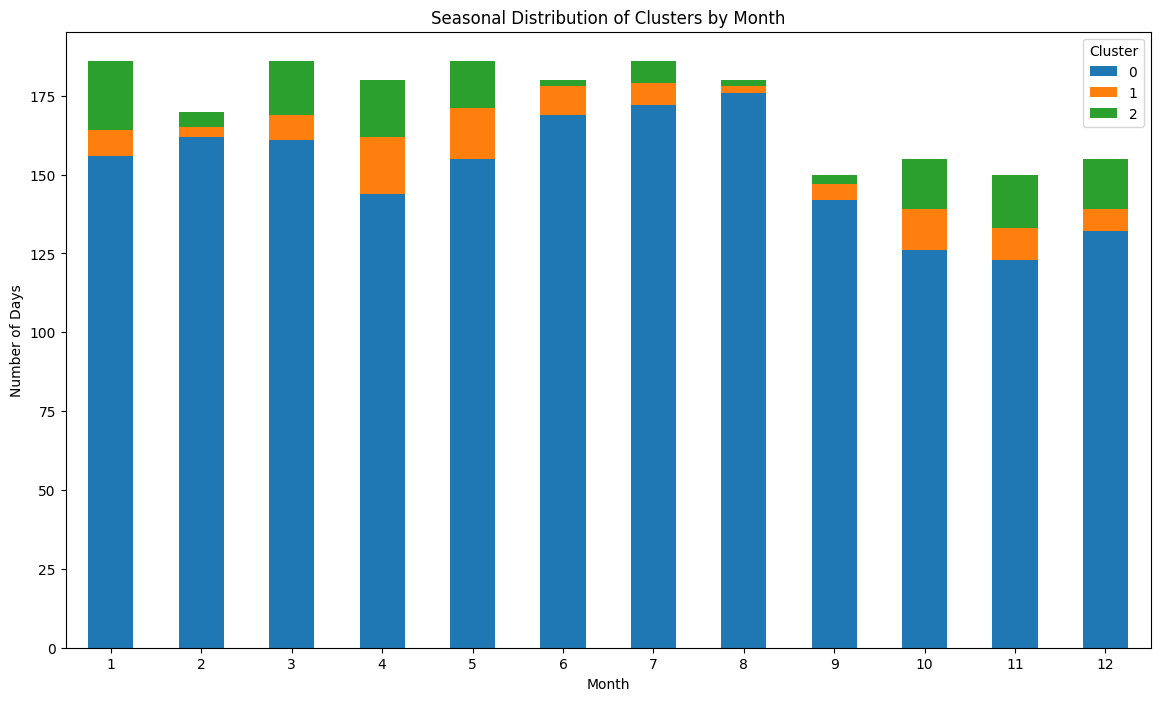

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have the daily_features DataFrame with clusters assigned

# Add a 'Month' column to represent the month of each day
daily_features['Month'] = daily_features.index.month

# Group the data by 'Month' and 'Cluster' to count the number of days in each cluster per month
monthly_cluster_counts = daily_features.groupby(['Month', 'Cluster']).size().unstack(fill_value=0)

# Plot the seasonal distribution of clusters by month
plt.figure(figsize=(14, 8))

# Stacked bar plot for each cluster
monthly_cluster_counts.plot(kind='bar', stacked=True, ax=plt.gca())

# Add labels and title
plt.title('Seasonal Distribution of Clusters by Month')
plt.xlabel('Month')
plt.ylabel('Number of Days')
plt.legend(title='Cluster')
plt.xticks(rotation=0)

# Show the plot
plt.show()


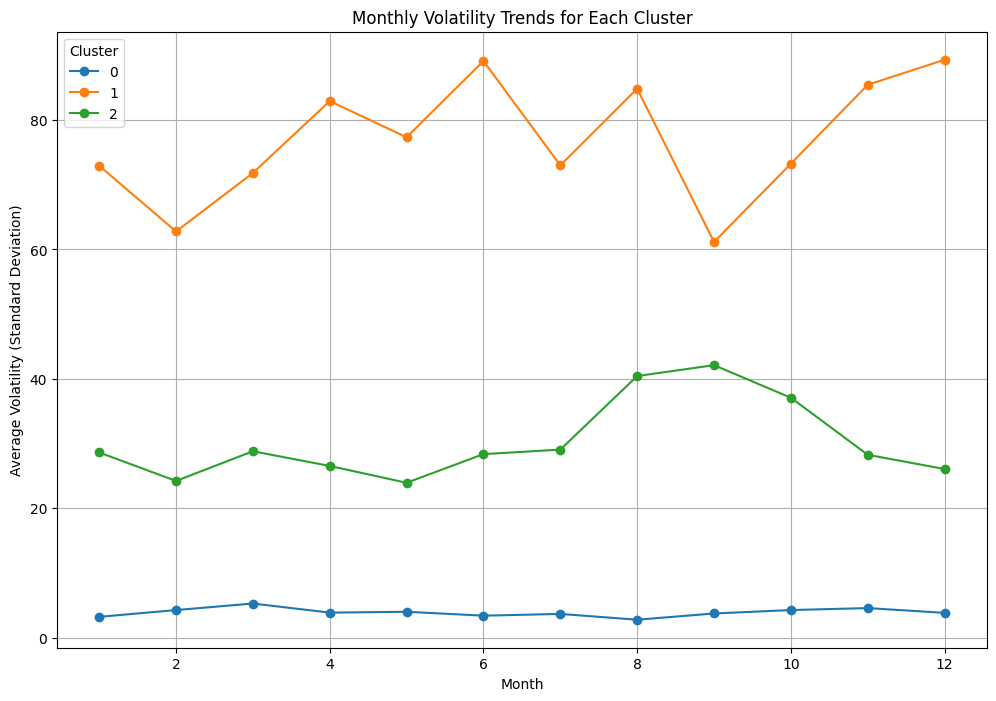

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'daily_features' DataFrame with 'std_dev' (volatility) and 'Cluster' columns exists

# Add a 'Month' column for seasonal analysis
daily_features['Month'] = daily_features.index.month

# Calculate average monthly volatility for each cluster
monthly_volatility = daily_features.groupby(['Month', 'Cluster'])['std_dev'].mean().unstack()

# Plot the average monthly volatility for each cluster
plt.figure(figsize=(12, 8))
monthly_volatility.plot(kind='line', marker='o', ax=plt.gca())

# Add labels, title, and legend
plt.title('Monthly Volatility Trends for Each Cluster')
plt.xlabel('Month')
plt.ylabel('Average Volatility (Standard Deviation)')
plt.legend(title='Cluster')
plt.grid(True)

# Show the plot
plt.show()


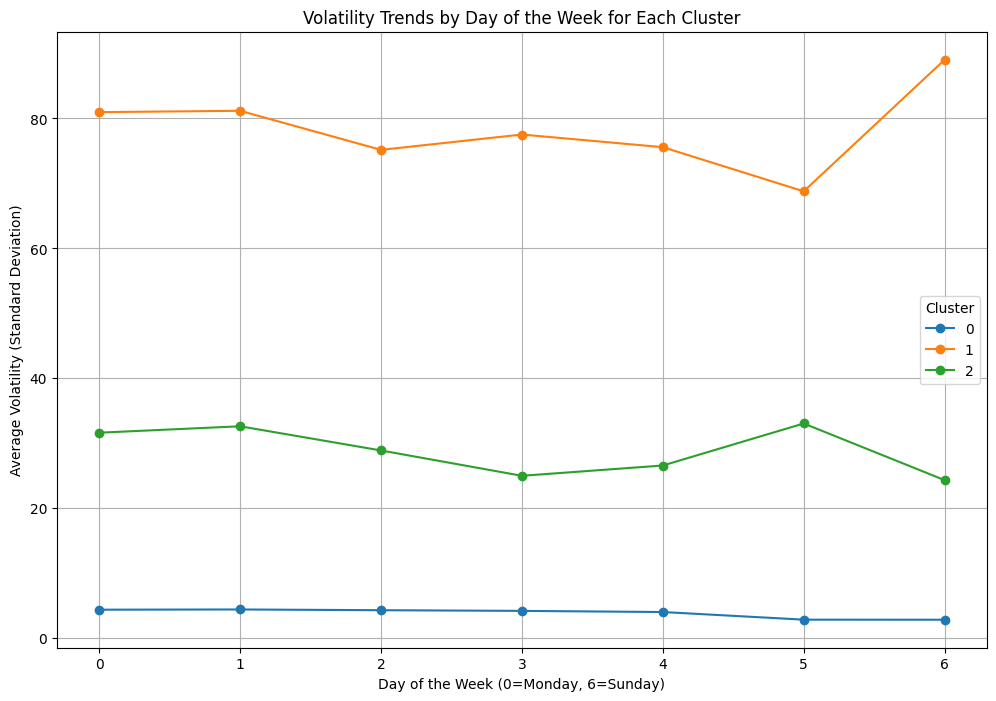

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'daily_features' DataFrame with 'std_dev' (volatility) and 'Cluster' columns exists

# Add a 'DayOfWeek' column for weekday analysis (0=Monday, 6=Sunday)
daily_features['DayOfWeek'] = daily_features.index.dayofweek

# Calculate average volatility (standard deviation) for each day of the week, for each cluster
weekly_volatility = daily_features.groupby(['DayOfWeek', 'Cluster'])['std_dev'].mean().unstack()

# Plot the average volatility for each cluster by day of the week
plt.figure(figsize=(12, 8))
weekly_volatility.plot(kind='line', marker='o', ax=plt.gca())

# Customize the plot
plt.title('Volatility Trends by Day of the Week for Each Cluster')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Average Volatility (Standard Deviation)')
plt.legend(title='Cluster')
plt.grid(True)

# Show the plot
plt.show()


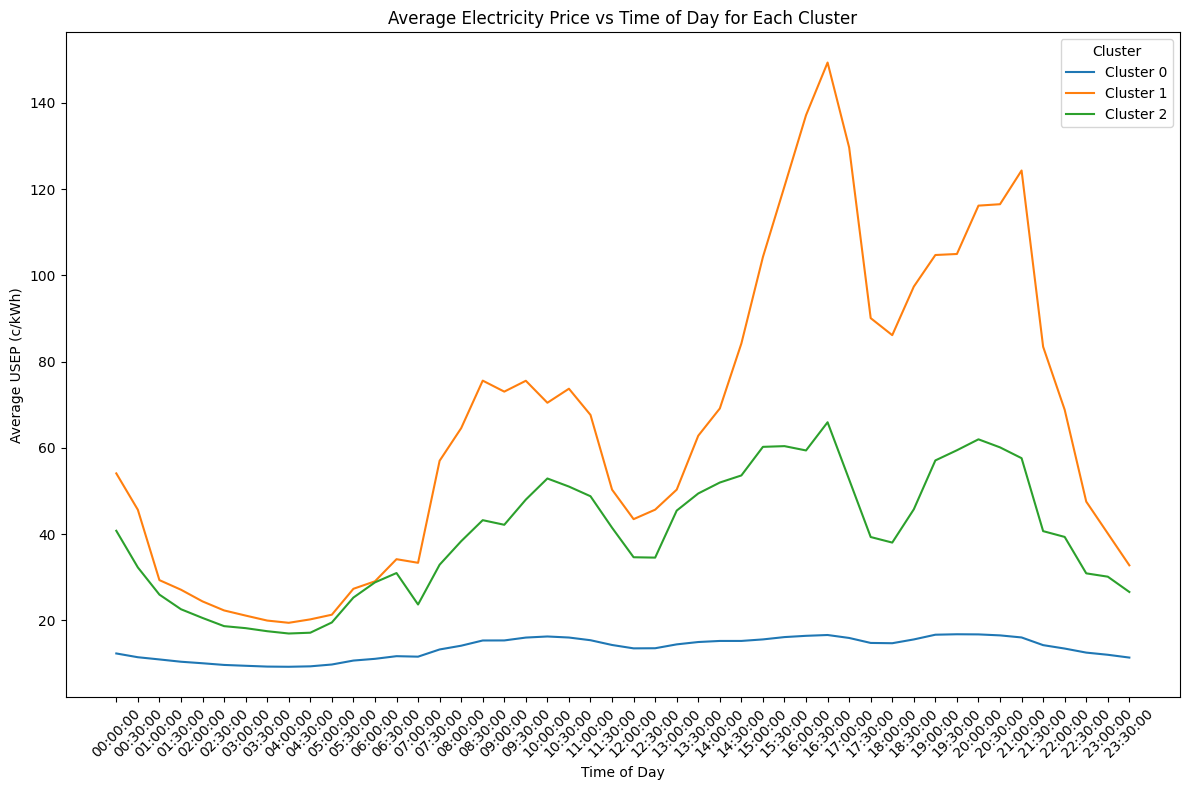

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'combined_df' contains the original data with 'USEP (c/kWh)'
# and 'daily_features' contains the cluster assignments for each day.

# Reset the index to bring 'Datetime' back as a column
combined_df_reset = combined_df.reset_index()

# Extract date and time components
combined_df_reset['Date'] = combined_df_reset['Datetime'].dt.date
combined_df_reset['Time'] = combined_df_reset['Datetime'].dt.time

# Ensure 'Datetime' is a column in 'daily_features'
daily_features_reset = daily_features.reset_index()
daily_features_reset['Date'] = daily_features_reset['Datetime'].dt.date

# Merge cluster labels into the combined data
combined_df_with_clusters = pd.merge(
    combined_df_reset,
    daily_features_reset[['Date', 'Cluster']],
    on='Date',
    how='left'
)

# Get the list of clusters
clusters = combined_df_with_clusters['Cluster'].unique()

plt.figure(figsize=(12, 8))

for cluster_num in sorted(clusters):
    cluster_data = combined_df_with_clusters[combined_df_with_clusters['Cluster'] == cluster_num]

    # Group by 'Time' and compute mean price
    time_group = cluster_data.groupby('Time')['USEP (c/kWh)'].mean().reset_index()

    # Sort the time values for plotting
    time_group = time_group.sort_values('Time')

    # Convert 'Time' to strings for plotting
    time_values = time_group['Time'].astype(str)

    # Plot
    plt.plot(time_values, time_group['USEP (c/kWh)'], label=f'Cluster {cluster_num}')

# Formatting the plot
plt.xlabel('Time of Day')
plt.ylabel('Average USEP (c/kWh)')
plt.title('Average Electricity Price vs Time of Day for Each Cluster')
plt.legend(title='Cluster')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Scale the data before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=X.shape[1])
X_pca = pca.fit_transform(X_scaled)

# Extract explained variance ratio to see the importance of each principal component
explained_variance = pca.explained_variance_ratio_

# Get the components that contribute the most to each principal component
pca_components = pd.DataFrame(pca.components_, columns=X.columns)

explained_variance, pca_components

# Creating a DataFrame to display the explained variance and component loadings
pca_summary = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance))],
    'Explained Variance Ratio': explained_variance
}).set_index('Principal Component')

# Adding the feature contributions to each principal component
pca_components_transposed = pca_components.T
pca_components_transposed.columns = [f'PC{i+1}' for i in range(pca_components.shape[0])]

# Combining the explained variance and feature loadings
pca_table = pd.concat([pca_summary, pca_components_transposed], axis=1)

# Displaying the table
pca_table



,Explained Variance Ratio,PC1,PC2,PC3,PC4,PC5,PC6
PC1,0.591859,NaN,NaN,NaN,NaN,NaN,NaN
PC2,0.260897,NaN,NaN,NaN,NaN,NaN,NaN
PC3,0.103922,NaN,NaN,NaN,NaN,NaN,NaN
PC4,0.025139,NaN,NaN,NaN,NaN,NaN,NaN
PC5,0.015539,NaN,NaN,NaN,NaN,NaN,NaN
PC6,0.002645,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.460048,0.351464,-0.014388,0.095170,0.746869,-0.312651
std_dev,NaN,0.483943,0.178427,0.413378,-0.144447,-0.048098,0.734781
skewness,NaN,0.318577,-0.587073,-0.197740,-0.700457,0.129807,-0.085219
kurtosis,NaN,0.268360,-0.655230,-0.025546,0.682630,0.113481,0.138358
